In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.text import Annotation
from matplotlib.patches import FancyArrowPatch
import matplotlib.patches as mpatches
from numpy import matlib

DATA_DIMENSION = 3
argument_resolution = 256

class Annotation3D(Annotation):
    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0,0), *args, **kwargs)
        self._xyz = xyz
 
    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, renderer.M)
        self.xy=(x2,y2)
        super().draw(renderer)
 
def _annotate3D(ax,text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''
 
    annotation= Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)
 
setattr(Axes3D,'annotate3D',_annotate3D)
 
class Arrow3D(FancyArrowPatch):
    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._xyz = (x,y,z)
        self._dxdydz = (dx,dy,dz)
 
    def draw(self, renderer):
        x1,y1,z1 = self._xyz
        dx,dy,dz = self._dxdydz
        x2,y2,z2 = (x1+dx,y1+dy,z1+dz)
 
        xs, ys, zs = proj_transform((x1,x2),(y1,y2),(z1,z2), renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        super().draw(renderer)
 
def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''
 
    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)
 
setattr(Axes3D,'arrow3D',_arrow3D)

class ellipsoid:
    def __init__(self):
        super(ellipsoid, self).__init__()
        self.phi = np.linspace(0,2 *np.pi, argument_resolution).reshape(argument_resolution, 1) # the angle of the projection in the xy-plane 
        self.theta = np.linspace(0, np.pi, argument_resolution).reshape(-1, argument_resolution) # the angle from the polar axis, ie the polar angle 
        self.x = np.sin(self.theta)*np.cos(self.phi) 
        self.y = np.sin(self.theta)*np.sin(self.phi) 
        self.z = np.cos(self.theta) 
        self.z_iterated = np.zeros((len(self.z[0]), len(self.z[0])))
        for i in range(len(self.z[0])):
            self.z_iterated[i] = self.z
               
        self.phi = np.linspace(0,2 *np.pi, 256).reshape(256, 1) # the angle of the projection in the xy-plane 
        self.theta = np.linspace(0, np.pi, 256).reshape(-1, 256) # the angle from the polar axis, ie the polar angle 
        
        self.fig = plt.figure(figsize=(20, 20)) # Square figure 
        self.ax = self.fig.add_subplot(111, projection='3d')
        u = np.linspace(0, np.pi, 100)
        v = np.linspace(0, np.pi, 100)
        R = 13
        x =  R* np.outer(np.cos(u), np.sin(v))
        y =  R* np.outer(np.sin(u), np.sin(v))
        z =  R* np.outer(np.ones(np.size(u)), np.cos(v))
        wire_density = 20
        #self.ax.plot_wireframe(x, y, z,rcount=wire_density, ccount=wire_density, antialiased=False)
        #self.ax.plot_surface(x, y, z,rcount=wire_density, ccount=wire_density, antialiased=False)


        
    def draw_ellipsoid(self, unit_ellipsoid_axes, radius_list, ellipsoid_center):
        #if ifexchange_axes:
        #    wire_frame_coordinates = wire_frame_coordinates[axes_exchange, :, :]
        #    unit_ellipsoid_axes = unit_ellipsoid_axes[axes_exchange, :] 
        #    unit_ellipsoid_axes = unit_ellipsoid_axes[:, axes_exchange] 
        #    radius_list = radius_list[axes_exchange]
        
        wire_frame_coordinates = np.stack([self.x, self.y, self.z_iterated]).transpose([1, 2, 0])
        x_transformed, y_transformed, z_transformed = np.zeros(self.x.shape), np.zeros(self.y.shape), np.zeros(self.z_iterated.shape)

        for i in range(len(self.x)):
            for j in range(len(self.y)):
                x_transformed[i][j], y_transformed[i][j], z_transformed[i][j] = np.dot((unit_ellipsoid_axes.T)*radius_list, wire_frame_coordinates[i][j]) + ellipsoid_center[0]
                #print((np.dot((unit_ellipsoid_axes.T)*radius_list, wire_frame_coordinates[i][j]).shape))
        
        wire_frame_coordinates = np.stack([x_transformed , y_transformed, z_transformed]) 
        #print(wire_frame_coordinates.shape)
                        
        #self.ax.arrow3D(ellipsoid_center[0][0], ellipsoid_center[0][1], ellipsoid_center[0][2], unit_ellipsoid_axes[0][0]*radius_list[0], unit_ellipsoid_axes[0][1]*radius_list[0], unit_ellipsoid_axes[0][2]*radius_list[0],
        #               mutation_scale=20,  arrowstyle="-|>", fc='orange', ec='orange', lw = 5)
        #self.ax.arrow3D(ellipsoid_center[0][0], ellipsoid_center[0][1], ellipsoid_center[0][2], unit_ellipsoid_axes[1][0]*radius_list[1], unit_ellipsoid_axes[1][1]*radius_list[1], unit_ellipsoid_axes[1][2]*radius_list[1],
        #               mutation_scale=20, arrowstyle="-|>", fc='orange', ec='orange', lw = 5)
        #self.ax.arrow3D(ellipsoid_center[0][0], ellipsoid_center[0][1], ellipsoid_center[0][2], unit_ellipsoid_axes[2][0]*radius_list[2], unit_ellipsoid_axes[2][1]*radius_list[2], unit_ellipsoid_axes[2][2]*radius_list[2],
        #               mutation_scale=20, arrowstyle="-|>", fc='orange', ec='orange', lw = 5)
         
        #self.ax.arrow3D(2*ellipsoid_center[0][0] - unit_ellipsoid_axes[0][0]*radius_list[0], 2*ellipsoid_center[0][1] - unit_ellipsoid_axes[0][1]*radius_list[0], 2*ellipsoid_center[0][2] - unit_ellipsoid_axes[0][2]*radius_list[0], unit_ellipsoid_axes[0][0]*radius_list[0], unit_ellipsoid_axes[0][1]*radius_list[0], unit_ellipsoid_axes[0][2]*radius_list[0],
        #               mutation_scale=20,  arrowstyle="-|>", fc='orange', ec='orange', lw = 5)
        #self.ax.arrow3D(ellipsoid_center[0][0], ellipsoid_center[0][1], ellipsoid_center[0][2], unit_ellipsoid_axes[1][0]*radius_list[1], unit_ellipsoid_axes[1][1]*radius_list[1], unit_ellipsoid_axes[1][2]*radius_list[1],
        #               mutation_scale=20, arrowstyle="-|>", fc='orange', ec='orange', lw = 5)
        #self.ax.arrow3D(ellipsoid_center[0][0], ellipsoid_center[0][1], ellipsoid_center[0][2], unit_ellipsoid_axes[2][0]*radius_list[2], unit_ellipsoid_axes[2][1]*radius_list[2], unit_ellipsoid_axes[2][2]*radius_list[2],
        #               mutation_scale=20, arrowstyle="-|>", fc='orange', ec='orange', lw = 5)    
            
        
        self.ax.arrow3D(0, 0, 0, unit_ellipsoid_axes[0][0]*radius_list[0]*6, unit_ellipsoid_axes[0][1]*radius_list[0]*6, unit_ellipsoid_axes[0][2]*radius_list[0]*6,
                       mutation_scale=20,  arrowstyle="-|>", fc='orange', ec='orange', lw = 5)
        self.ax.arrow3D(ellipsoid_center[0][0], ellipsoid_center[0][1], ellipsoid_center[0][2], unit_ellipsoid_axes[1][0]*radius_list[1], unit_ellipsoid_axes[1][1]*radius_list[1], unit_ellipsoid_axes[1][2]*radius_list[1],
                       mutation_scale=20, arrowstyle="-|>", fc='orange', ec='orange', lw = 5)
        self.ax.arrow3D(ellipsoid_center[0][0], ellipsoid_center[0][1], ellipsoid_center[0][2], unit_ellipsoid_axes[2][0]*radius_list[2], unit_ellipsoid_axes[2][1]*radius_list[2], unit_ellipsoid_axes[2][2]*radius_list[2],
                       mutation_scale=20, arrowstyle="-|>", fc='orange', ec='orange', lw = 5)  
        
        self.ax.text(ellipsoid_center[0][0]+unit_ellipsoid_axes[0][0] , ellipsoid_center[0][1]+unit_ellipsoid_axes[0][1], ellipsoid_center[0][2]+unit_ellipsoid_axes[0][2], r'$v_0$', fontsize=20)
        self.ax.text(ellipsoid_center[0][0]+unit_ellipsoid_axes[1][0] , ellipsoid_center[0][1]+unit_ellipsoid_axes[1][1], ellipsoid_center[0][2]+unit_ellipsoid_axes[1][2], r'$v_1$', fontsize=20)
        self.ax.text(ellipsoid_center[0][0]+unit_ellipsoid_axes[2][0] , ellipsoid_center[0][1]+unit_ellipsoid_axes[2][1], ellipsoid_center[0][2]+unit_ellipsoid_axes[2][2], r'$v_2$', fontsize=20)

        self.ax.plot_wireframe(wire_frame_coordinates[0], wire_frame_coordinates[1], wire_frame_coordinates[2], color='black',rcount=10, ccount=10) 

        grid_range = 10
        self.ax.set_xlim(-grid_range, grid_range)
        self.ax.set_ylim(-grid_range, grid_range)
        self.ax.set_zlim(-grid_range, grid_range)
        #ax.view_init(elev=-180, azim=-60)

        self.ax.set_xlabel('x', fontsize=30)
        self.ax.set_ylabel('y', fontsize=30)
        self.ax.set_zlabel('z', fontsize=30)
        
        
def grape_piece_moment(start_point, center_of_piece):
    orthonormal_matrix, _ = np.linalg.qr(np.c_[(center_of_piece - start_point).T, np.ones((3, 2))])
    if(int(np.sign(orthonormal_matrix[0][0]))!=int(np.sign(center_of_piece-start_point)[0][0])):
        orthonormal_matrix = -orthonormal_matrix
    radius=5
    raidus_list = np.array([0.6, 0.3, 0.4])*radius
    return orthonormal_matrix.T, raidus_list

[[-1.75602101  9.43287161 -2.81732557]
 [ 5.04022909  7.32112944  4.58226522]
 [ 0.          0.          0.        ]
 [-5.58754612  8.11612879 -1.70522193]]
4


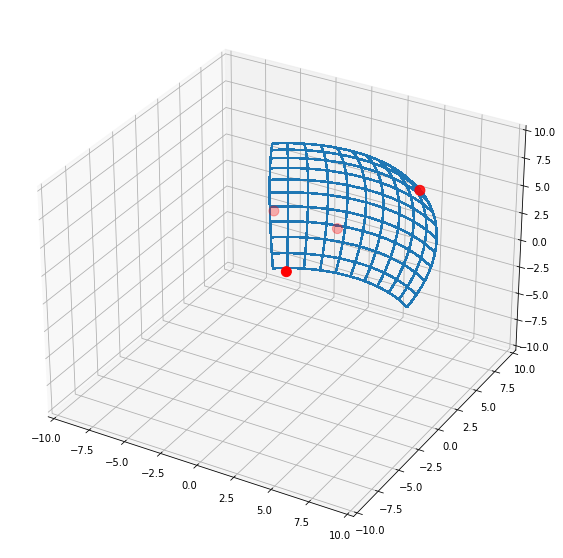

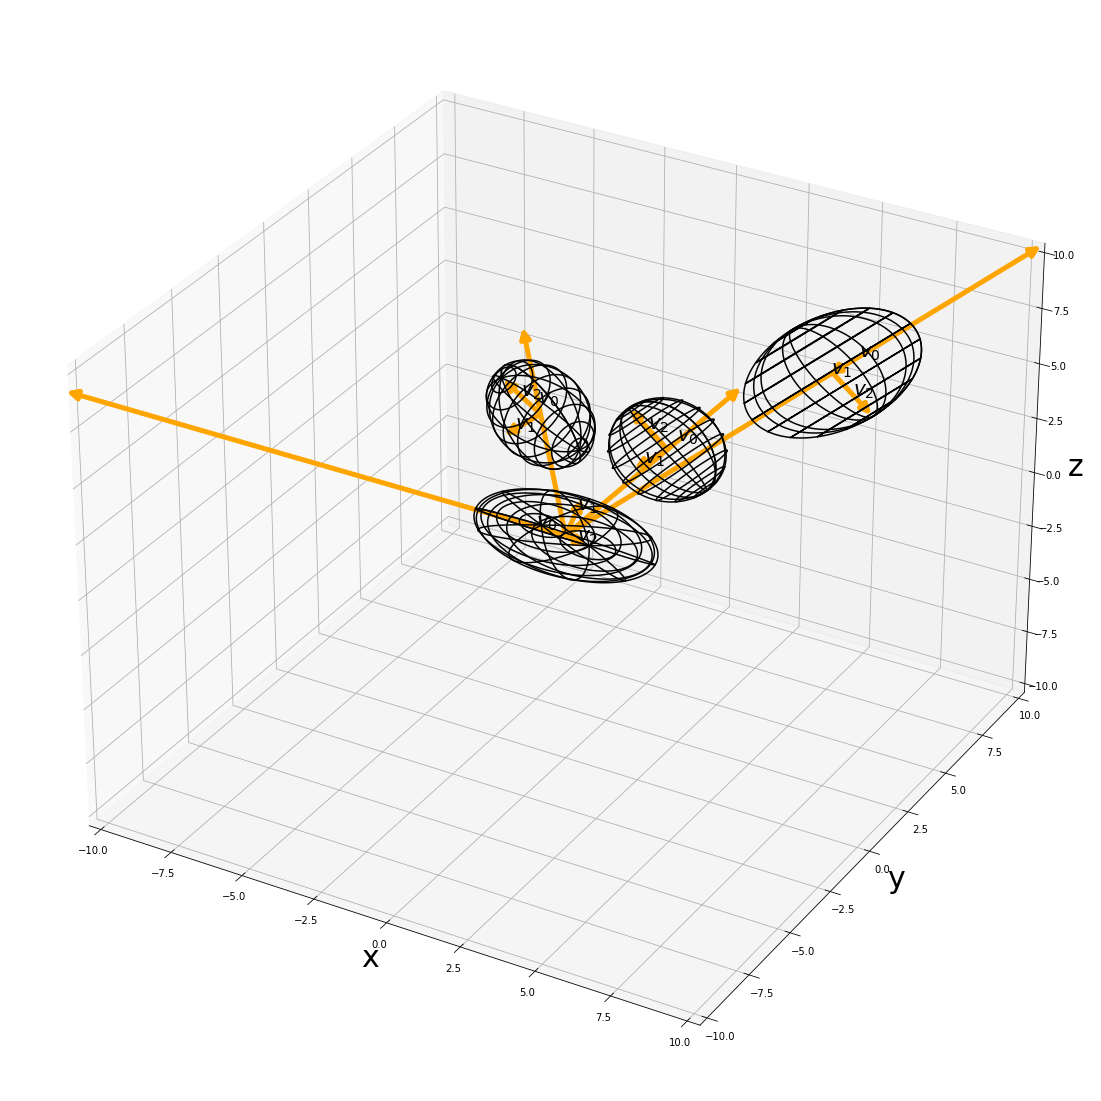

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')


alpha = 0.3
beta = 0.3
u = np.linspace(np.pi*alpha , np.pi*(1-alpha), 100)
v = np.linspace(np.pi*beta , np.pi*(1-beta), 100)
x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))

polar_coordinates =  np.stack([x, y, z]).transpose([1, 2, 0]) 



number_of_random_points =4

#random_polar_coordinates = np.random.randint(0,100,size=[number_of_random_points,2])
random_normal_coordinates = np.zeros((number_of_random_points, 3)) 

berry_piece_interval = 10
iter_threshold = 1000

cnt = 0
iter_counter = 0
iter_thresh = 10000

while(cnt<=number_of_random_points):
        
    normal_coordinate_temp = polar_coordinates[tuple(np.random.randint(0, 100, 2))]
    #print(polar_coordinate_temp.shape)
    
    if(np.count_nonzero(np.sqrt(((random_normal_coordinates[:cnt]-normal_coordinate_temp)**2).sum(axis=1)) > berry_piece_interval)==cnt):
        random_normal_coordinates[cnt-1] = normal_coordinate_temp
        cnt = cnt + 1
        
    iter_counter = iter_counter + 1
    
    if(iter_counter > iter_thresh):
        break
    
    
    
         
    #print(random_normal_coordinates)
    
wire_density = 10
ax.plot_wireframe(x, y, z,rcount=wire_density, ccount=wire_density, antialiased=False)

print(random_normal_coordinates)

ax.scatter(random_normal_coordinates[:, 0], random_normal_coordinates[:, 1], random_normal_coordinates[:, 2], color='red', s=100)

ellipsoid_test = ellipsoid()


print(len(random_normal_coordinates))
for i in range(len(random_normal_coordinates)):
    start_point = np.array([[0, 0, 0]])
    center_of_piece = np.array([random_normal_coordinates[i]])
    unit_ellipsoid_axes, radius_list = grape_piece_moment(start_point, center_of_piece)
    ellipsoid_test.draw_ellipsoid(unit_ellipsoid_axes, radius_list, center_of_piece)



grid_range = 10
ax.set_xlim(-grid_range, grid_range)
ax.set_ylim(-grid_range, grid_range)
ax.set_zlim(-grid_range, grid_range)
plt.show()



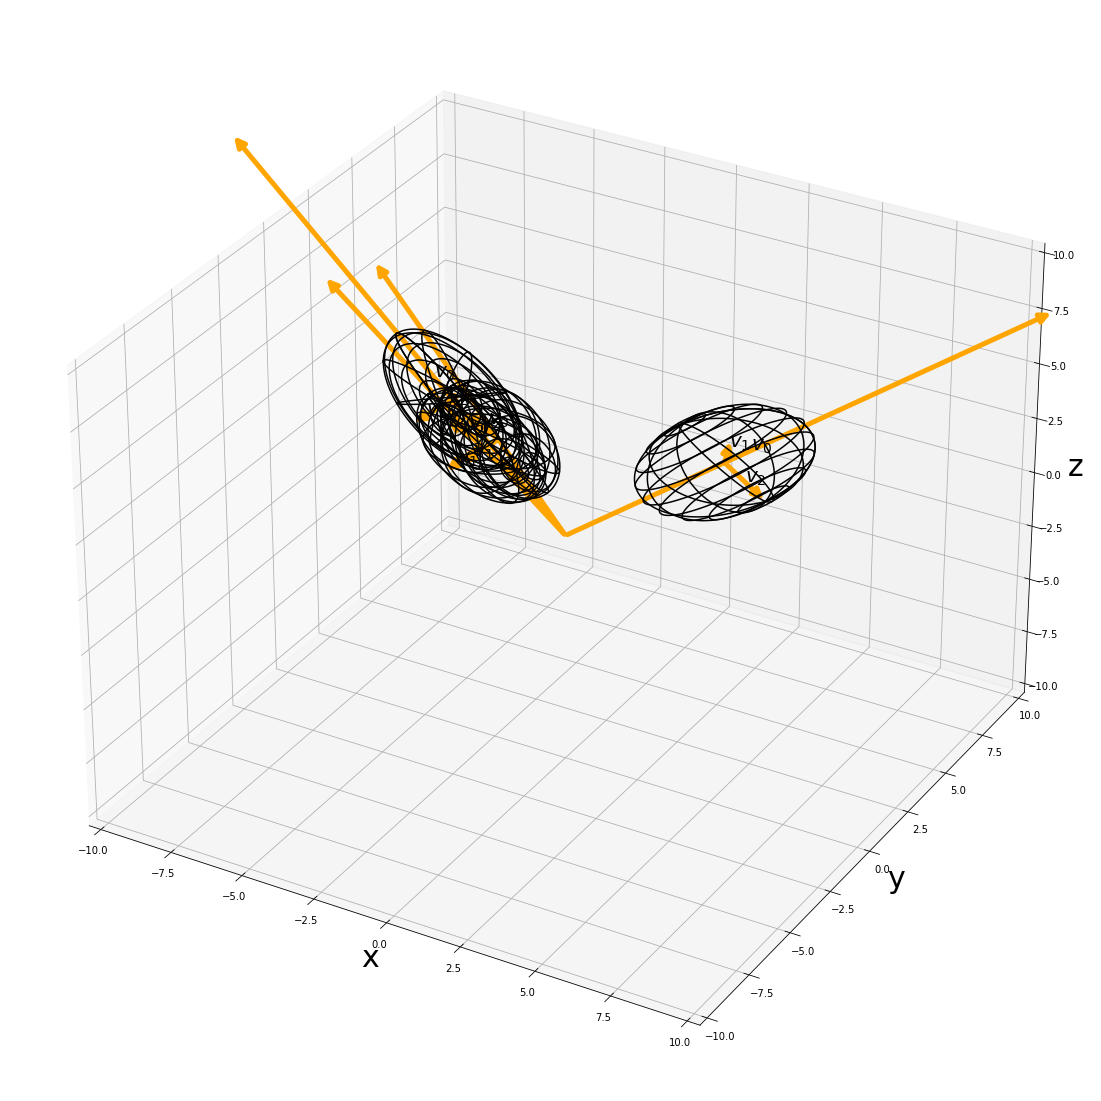

In [3]:
# Make data
u = np.linspace(0,  np.pi, 100)
v = np.linspace(0, np.pi /2, 100)

R = 6

x = R * np.outer(np.cos(u), np.sin(v))
y = R * np.outer(np.sin(u), np.sin(v))
z = R * np.outer(np.ones(np.size(u)), np.cos(v))

polar_coordinates =  np.stack([x, y, z]).transpose([1, 2, 0]) 

number_of_random_points = 4
random_polar_coordinates = np.random.randint(0,100,size=[number_of_random_points,2])
random_normal_coordinates = np.zeros((number_of_random_points, 3))


ellipsoid_test = ellipsoid()
for i in range(len(random_polar_coordinates)):
    random_normal_coordinates[i] = polar_coordinates[tuple(random_polar_coordinates[i])]
    start_point = np.array([[0, 0, 0]])
    center_of_piece = np.array([random_normal_coordinates[i]])
    unit_ellipsoid_axes, radius_list = grape_piece_moment(start_point, center_of_piece)
    ellipsoid_test.draw_ellipsoid(unit_ellipsoid_axes, radius_list, center_of_piece)

grid_range = 10
ax.set_xlim(-grid_range, grid_range)
ax.set_ylim(-grid_range, grid_range)
ax.set_zlim(-grid_range, grid_range)
plt.show()